In [1]:
# We will be using a data set for house features to predict what the price of the house is

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import historical data on housing prices in King County Seattle
df =pd.read_csv('DATA/kc_house_data.csv')

In [4]:
# let's perform exploratory data analysis to find out if there is any missing data or trends
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# no missing data it seems
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

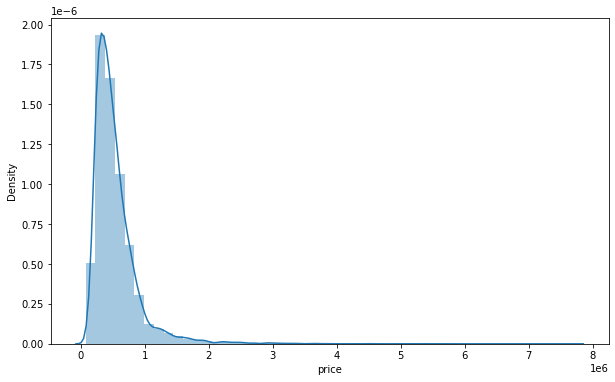

In [7]:
# make a distribution plot for the
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

In [8]:
# it may be a good idea to remove outliers later in this analysis

C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

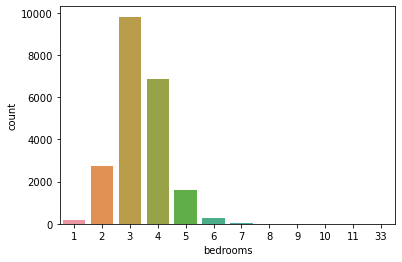

In [9]:
# explore the amount of bedroom
sns.countplot(df['bedrooms'])

In [10]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

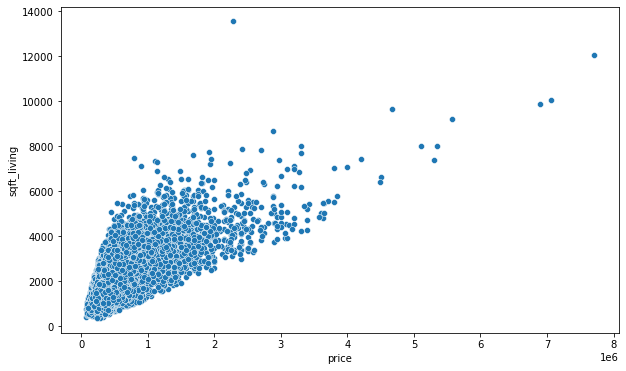

In [11]:
# let's explore highly correlated features with a scatter plot
plt.figure(figsize=[10,6])
sns.scatterplot(x = 'price', y= 'sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

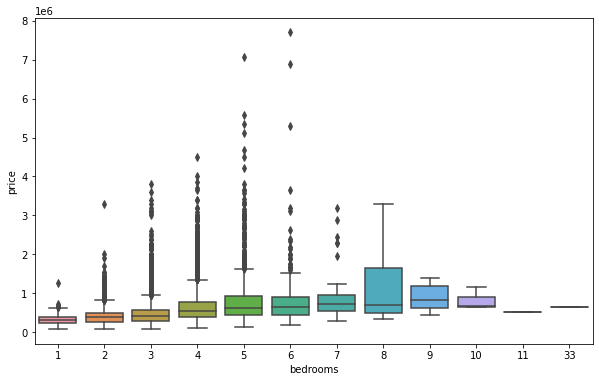

In [12]:
# let's do 
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data = df)

<AxesSubplot:xlabel='price', ylabel='long'>

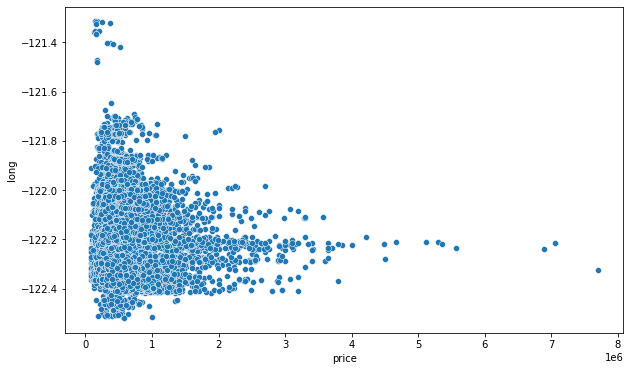

In [13]:
# let's explore lattitude and longitude data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'price', y= 'long',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

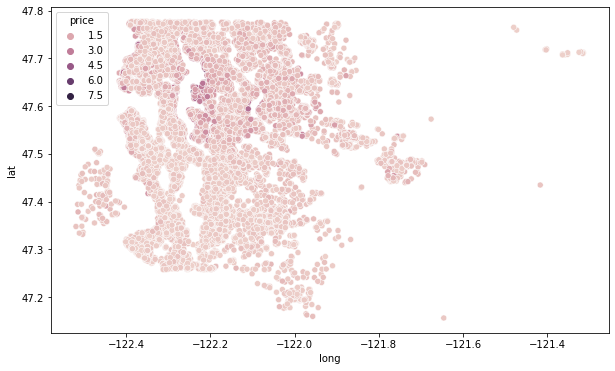

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'long', y= 'lat',hue = 'price',data=df)

In [15]:
len(df)*0.01

215.97

In [16]:
# filter out all of the most expensive house
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

In [17]:
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

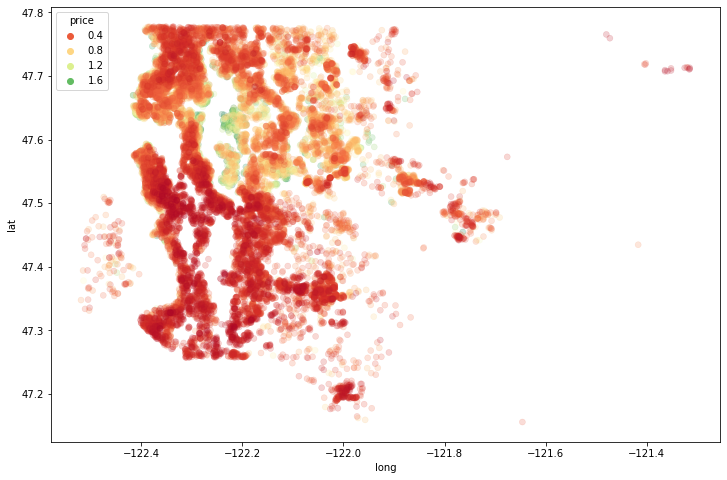

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'long', y= 'lat',hue = 'price',data=non_top_1_perc, 
                edgecolor=None, alpha=0.2, palette = 'RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

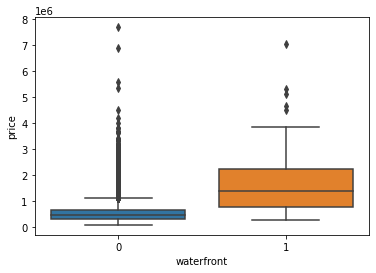

In [19]:
sns.boxplot(data = df, x='waterfront',y='price')

## Part 2 EDA continued

In [20]:
# first drop the 'id' column
# then convert dates from strings to date time objects


In [21]:
df = df.drop('id',axis=1)

In [22]:
# To convert elements to datetime objects
df['date'] = pd.to_datetime(df['date'])

In [23]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [24]:
# let's use a LAMBDA function to remove the year and month component from the datetime objects
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

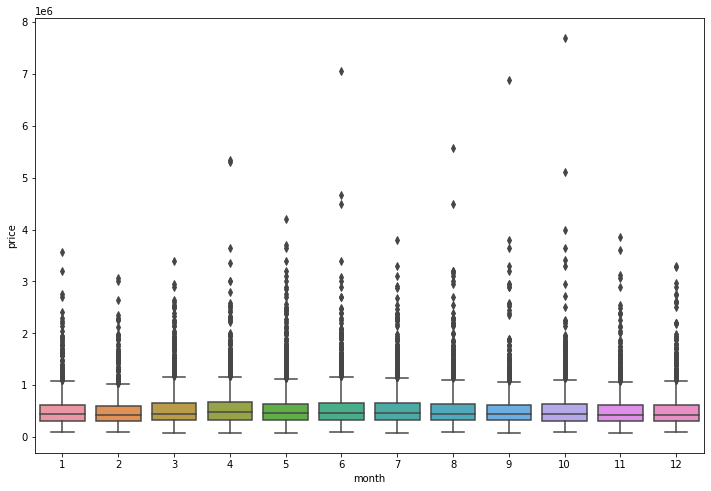

In [26]:
plt.figure(figsize = (12,8))

sns.boxplot(x='month',y='price', data= df)

<AxesSubplot:xlabel='month'>

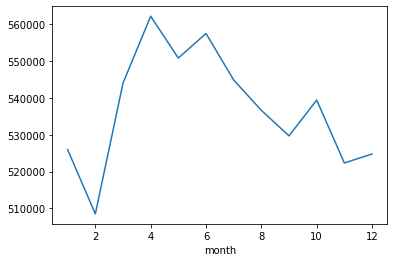

In [27]:
df.groupby('month').mean()['price'].plot()

In [28]:
df =df.drop('date',axis=1)

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [31]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [32]:
# maybe we could map out expensive zipcodes and feature engineer separations for them but that is beyond this scope

In [33]:
df = df.drop('zipcode',axis=1)

In [34]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [35]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Part 3 Data Preprocessing and Creating a Model

In [36]:
X = df.drop('price',axis=1).values
y =df['price'].values

In [37]:
# import train test split
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
# what we try to do is base the amount of neurons in each layer on the amount of features

In [45]:
X_train.shape

(15117, 19)

In [46]:
model = Sequential()


model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

# We will use the adam optimizer this time
model.compile(optimizer='adam', loss='mse')

In [47]:
# Now let's optimize the cost function to a minimum

model.fit(x=X_train, y=y_train, validation_data = (X_test,y_test),
         batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 3s 8ms/step - loss: 430240301056.0000 - val_loss: 418923511808.0000
Epoch 2/400
119/119 [==============================] - 1s 5ms/step - loss: 429443284992.0000 - val_loss: 416267141120.0000
Epoch 3/400
119/119 [==============================] - 1s 8ms/step - loss: 419047407616.0000 - val_loss: 392545632256.0000
Epoch 4/400
119/119 [==============================] - 1s 7ms/step - loss: 366218412032.0000 - val_loss: 302738800640.0000
Epoch 5/400
119/119 [==============================] - 1s 8ms/step - loss: 237848510464.0000 - val_loss: 155094138880.0000
Epoch 6/400
119/119 [==============================] - 1s 8ms/step - loss: 121634545664.0000 - val_loss: 97480679424.0000
Epoch 7/400
119/119 [==============================] - 1s 6ms/step - loss: 98984665088.0000 - val_loss: 94793359360.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 97182867456.0000 - val_loss: 93391470592.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 1s 10ms/step - loss: 39126196224.0000 - val_loss: 37911678976.0000
Epoch 69/400
119/119 [==============================] - 1s 8ms/step - loss: 38959931392.0000 - val_loss: 37703983104.0000
Epoch 70/400
119/119 [==============================] - 1s 8ms/step - loss: 38746140672.0000 - val_loss: 37496266752.0000
Epoch 71/400
119/119 [==============================] - 1s 7ms/step - loss: 38510628864.0000 - val_loss: 37349666816.0000
Epoch 72/400
119/119 [==============================] - 1s 8ms/step - loss: 38394658816.0000 - val_loss: 37099585536.0000
Epoch 73/400
119/119 [==============================] - 1s 7ms/step - loss: 38152593408.0000 - val_loss: 36922990592.0000
Epoch 74/400
119/119 [==============================] - 1s 6ms/step - loss: 38006333440.0000 - val_loss: 36737081344.0000
Epoch 75/400
119/119 [==============================] - 1s 5ms/step - loss: 37815906304.0000 - val_loss: 36574580736.0000
Epoch 76/400
119/119 [==============

Epoch 135/400
119/119 [==============================] - 1s 6ms/step - loss: 33384683520.0000 - val_loss: 31934179328.0000
Epoch 136/400
119/119 [==============================] - 1s 5ms/step - loss: 33329975296.0000 - val_loss: 31936157696.0000
Epoch 137/400
119/119 [==============================] - 1s 7ms/step - loss: 33349494784.0000 - val_loss: 31874861056.0000
Epoch 138/400
119/119 [==============================] - 1s 7ms/step - loss: 33276231680.0000 - val_loss: 31815694336.0000
Epoch 139/400
119/119 [==============================] - 1s 7ms/step - loss: 33244786688.0000 - val_loss: 31798538240.0000
Epoch 140/400
119/119 [==============================] - 1s 6ms/step - loss: 33228259328.0000 - val_loss: 31736678400.0000
Epoch 141/400
119/119 [==============================] - 1s 6ms/step - loss: 33223714816.0000 - val_loss: 31688966144.0000
Epoch 142/400
119/119 [==============================] - 1s 6ms/step - loss: 33130416128.0000 - val_loss: 31707045888.0000
Epoch 143/400
11

119/119 [==============================] - 1s 7ms/step - loss: 31783436288.0000 - val_loss: 30076354560.0000
Epoch 202/400
119/119 [==============================] - 1s 6ms/step - loss: 31738923008.0000 - val_loss: 30109990912.0000
Epoch 203/400
119/119 [==============================] - 1s 7ms/step - loss: 31777318912.0000 - val_loss: 30003353600.0000
Epoch 204/400
119/119 [==============================] - 1s 6ms/step - loss: 31735666688.0000 - val_loss: 29988784128.0000
Epoch 205/400
119/119 [==============================] - 1s 5ms/step - loss: 31717738496.0000 - val_loss: 30206449664.0000
Epoch 206/400
119/119 [==============================] - 1s 6ms/step - loss: 31661582336.0000 - val_loss: 29976750080.0000
Epoch 207/400
119/119 [==============================] - 1s 6ms/step - loss: 31693232128.0000 - val_loss: 29993506816.0000
Epoch 208/400
119/119 [==============================] - 1s 7ms/step - loss: 31682027520.0000 - val_loss: 29910503424.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 30939828224.0000 - val_loss: 29005592576.0000
Epoch 268/400
119/119 [==============================] - 1s 5ms/step - loss: 30950592512.0000 - val_loss: 29020968960.0000
Epoch 269/400
119/119 [==============================] - 1s 6ms/step - loss: 30922446848.0000 - val_loss: 29011068928.0000
Epoch 270/400
119/119 [==============================] - 1s 7ms/step - loss: 31052326912.0000 - val_loss: 28988327936.0000
Epoch 271/400
119/119 [==============================] - 1s 6ms/step - loss: 30896631808.0000 - val_loss: 28939726848.0000
Epoch 272/400
119/119 [==============================] - 1s 6ms/step - loss: 30899318784.0000 - val_loss: 28937793536.0000
Epoch 273/400
119/119 [==============================] - 1s 6ms/step - loss: 30909505536.0000 - val_loss: 28922853376.0000
Epoch 274/400
119/119 [==============================] - 1s 6ms/step - loss: 30886830080.0000 - val_loss: 28968212480.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 30388465664.0000 - val_loss: 28294225920.0000
Epoch 334/400
119/119 [==============================] - 1s 6ms/step - loss: 30459904000.0000 - val_loss: 28265709568.0000
Epoch 335/400
119/119 [==============================] - 1s 5ms/step - loss: 30382553088.0000 - val_loss: 28299171840.0000
Epoch 336/400
119/119 [==============================] - 1s 8ms/step - loss: 30362150912.0000 - val_loss: 28261576704.0000
Epoch 337/400
119/119 [==============================] - 1s 7ms/step - loss: 30357458944.0000 - val_loss: 28258439168.0000
Epoch 338/400
119/119 [==============================] - 1s 6ms/step - loss: 30357641216.0000 - val_loss: 28254144512.0000
Epoch 339/400
119/119 [==============================] - 1s 6ms/step - loss: 30365005824.0000 - val_loss: 28227897344.0000
Epoch 340/400
119/119 [==============================] - 1s 6ms/step - loss: 30329382912.0000 - val_loss: 28225118208.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 1s 5ms/step - loss: 29891178496.0000 - val_loss: 27682027520.0000
Epoch 400/400
119/119 [==============================] - 1s 7ms/step - loss: 29922947072.0000 - val_loss: 27685945344.0000


## Part 4 Evaluation and Predictions

In [48]:
# Look at the model history for all the losses
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302403e+11,4.189235e+11
1,4.294433e+11,4.162671e+11
2,4.190474e+11,3.925456e+11
3,3.662184e+11,3.027388e+11
4,2.378485e+11,1.550941e+11
...,...,...
395,2.996843e+10,2.774106e+10
396,2.991673e+10,2.788643e+10
397,2.998090e+10,2.773232e+10
398,2.989118e+10,2.768203e+10


In [49]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

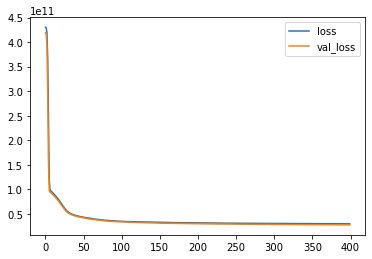

In [50]:
losses.plot()

In [ ]:
# let's do some evaluation of the test data then

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [54]:
predictions  = model.predict(X_test)

203/203 [==============================] - 1s 4ms/step


In [55]:
mean_squared_error(y_test, predictions)

27685948914.989483

In [56]:
# Take the sqrt of the mean squared error
np.sqrt(mean_squared_error(y_test, predictions))

166390.95202260694

In [57]:
mean_absolute_error(y_test,predictions)

103233.54749891494

In [58]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [62]:
5.402966e+05

540296.6

In [63]:
explained_variance_score(y_test, predictions)

0.791335341145941

In [ ]:
# not bad

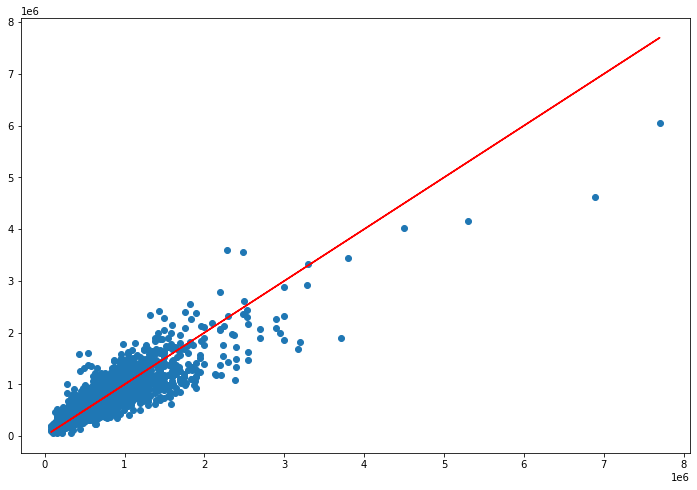

In [67]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [69]:
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [70]:
single_house = df.drop('price',axis=1).iloc[0]

In [71]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [72]:
single_house = scaler.transform(single_house.values.reshape(-1,19)) # the -1 keeps the original data structure shape

In [73]:
# It looks like the model overpredicts the actual value of a house based on these features
model.predict(single_house)

1/1 [==============================] - 0s 47ms/step


array([[289908.56]], dtype=float32)

In [74]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [ ]:
# one way to fix this is to dropping your top 1-2 percent of values and retrain the data set